In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the Excel file
house_df = pd.read_excel("C:/Users/r_mat/Classwork/Project_04/train_processed.xlsx")

# Specify columns to clean
columns_to_clean =['Id', 'Alley', 'LandSlope', 'RoofMatl', 'Condition2', 'Exterior1st', 'Exterior2nd',
 'MasVnrType', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2',
 'Heating', 'SaleCondition', 'SaleType', 'YrSold', 'MoSold', 'MiscVal', 'MiscFeature',
 'ScreenPorch', '3SsnPorch', 'LowQualFinSF', 'Electrical', 'Distance from 2008',
 'Adjusted Sale Price']


# Drop specified columns from the DataFrame
house_df_cleaned = house_df.drop(columns=columns_to_clean)

# Save the DataFrame back to Excel with the cleaned-up column names
house_df_cleaned.to_excel("C:/Users/r_mat/Classwork/Project_04/train_processed_cleaned.xlsx", index=False)

# Display the cleaned DataFrame
house_df_cleaned.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,Fence,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,CollgCr,...,TA,TA,Y,0,61,0,0,NaN,NaN,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Veenker,...,TA,TA,Y,298,0,0,0,NaN,NaN,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,CollgCr,...,TA,TA,Y,0,42,0,0,NaN,NaN,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Crawfor,...,TA,TA,Y,0,35,272,0,NaN,NaN,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,NoRidge,...,TA,TA,Y,192,84,0,0,NaN,NaN,250000


In [3]:
# Determine the number of unique values in each column.
house_df.nunique()


Id                     1460
MSSubClass               15
MSZoning                  5
LotFrontage             110
LotArea                1073
                       ... 
SaleType                  9
SaleCondition             6
SalePrice               663
Distance from 2008        5
Adjusted Sale Price    1076
Length: 83, dtype: int64

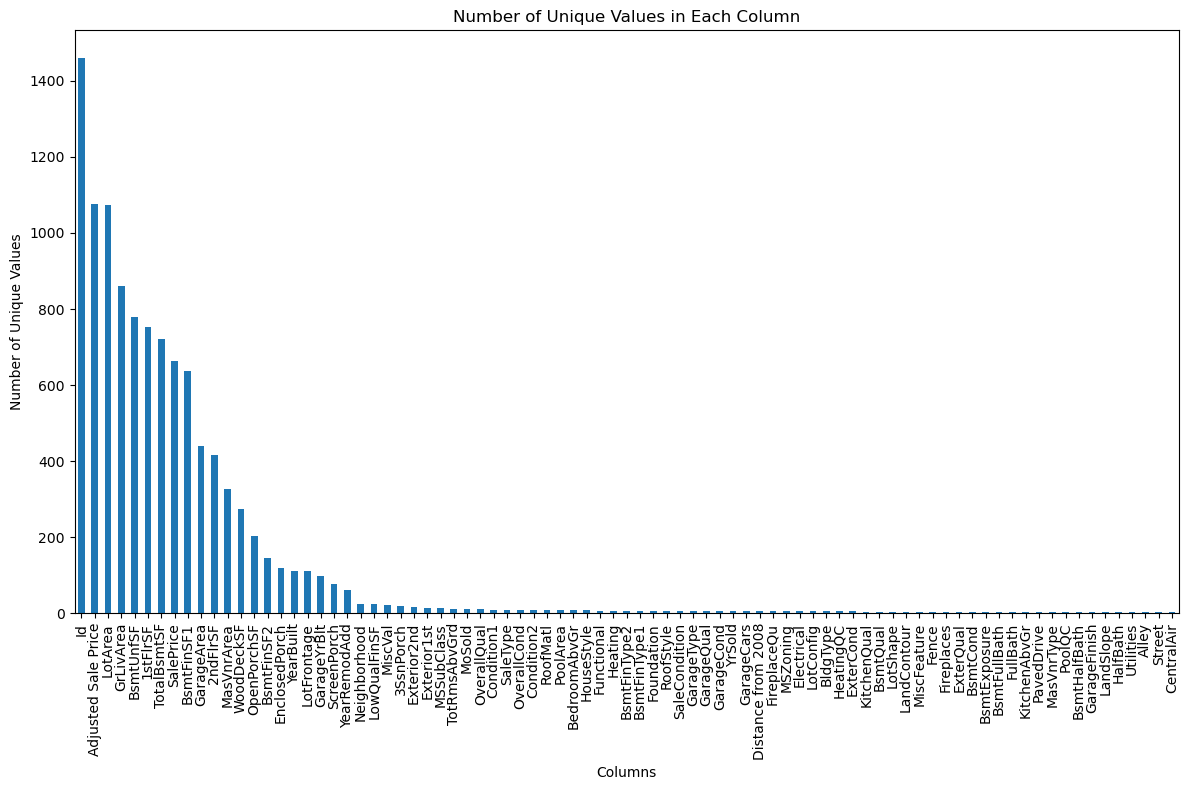

In [4]:
# Calculate the number of unique values for each column
unique_counts = house_df.nunique()

# Sort the unique counts in descending order for better visualization
unique_counts_sorted = unique_counts.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
unique_counts_sorted.plot(kind='bar')
plt.title('Number of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [5]:
# Categorizations based on Quartiles

house_df['Sales_bin'] = pd.qcut(house_df['SalePrice'],
                           q=[0, .5, 1],
                           labels=['Below','Above'])

house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Distance from 2008,Adjusted Sale Price,Sales_bin
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,0,208500.0,Above
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,1,191482.5,Above
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,0,223500.0,Above
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,2,155400.0,Below
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,0,250000.0,Above


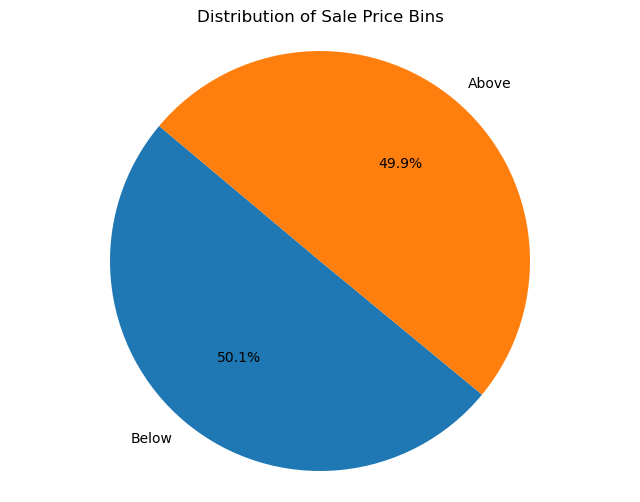

In [6]:
# Categorize SalePrice into bins
house_df['Sales_bin'] = pd.qcut(house_df['SalePrice'], q=[0, .5, 1], labels=['Below','Above'])

# Count the occurrences of each category
sales_bin_counts = house_df['Sales_bin'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sales_bin_counts, labels=sales_bin_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sale Price Bins')
plt.axis('equal')
plt.show()

In [7]:
house_df = house_df.drop(columns=["SalePrice"])

In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
house_df_dummies = pd.get_dummies(house_df)
house_df_dummies.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Sales_bin_Below,Sales_bin_Above
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,True,False,False,False,False,True,False,False,True
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,True,False,False,False,False,True,False,False,True
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,True,False,False,False,False,True,False,False,True
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,True,True,False,False,False,False,False,True,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,True,False,False,False,False,True,False,False,True


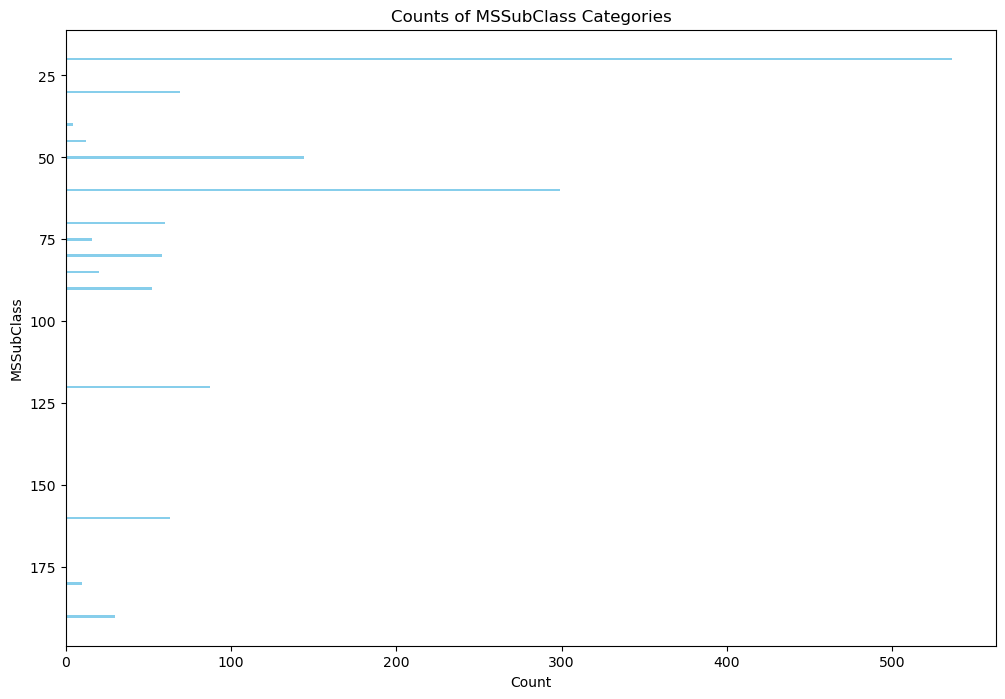

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from Excel file
house_df = pd.read_excel("C:/Users/r_mat/Classwork/Project_04/train_processed.xlsx")

# Get the counts of each MSSubClass category
mssubclass_counts = house_df['MSSubClass'].value_counts()

# Extract labels and counts from value_counts() result
mssubclass_labels = mssubclass_counts.index.tolist()
mssubclass_counts = mssubclass_counts.tolist()

# Create horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(mssubclass_labels, mssubclass_counts, color='skyblue')
plt.title('Counts of MSSubClass Categories')
plt.xlabel('Count')
plt.ylabel('MSSubClass')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()


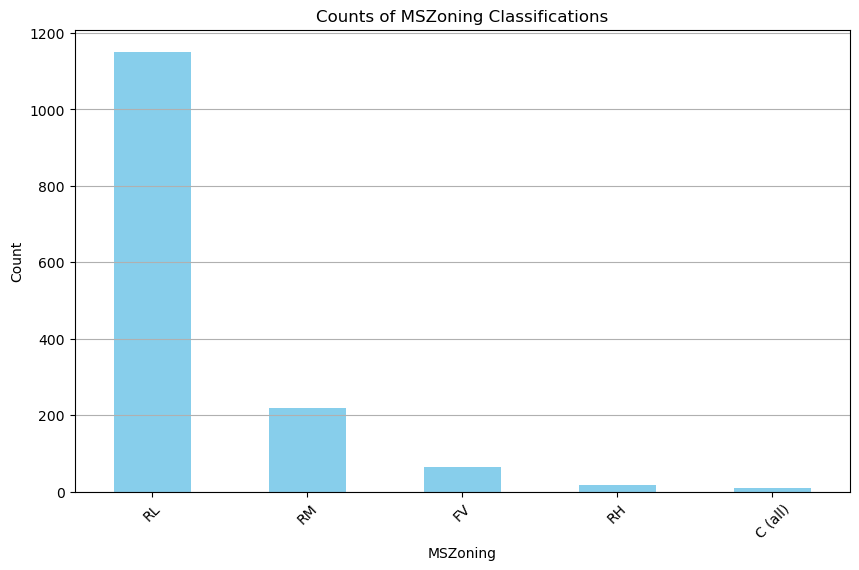

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
house_df = pd.read_excel("C:/Users/r_mat/Classwork/Project_04/train_processed.xlsx")

# Get the counts of each MSZoning classification
mszoning_counts = house_df['MSZoning'].value_counts()

# Create bar chart
plt.figure(figsize=(10, 6))
mszoning_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of MSZoning Classifications')
plt.xlabel('MSZoning')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Show gridlines only on y-axis
plt.show()


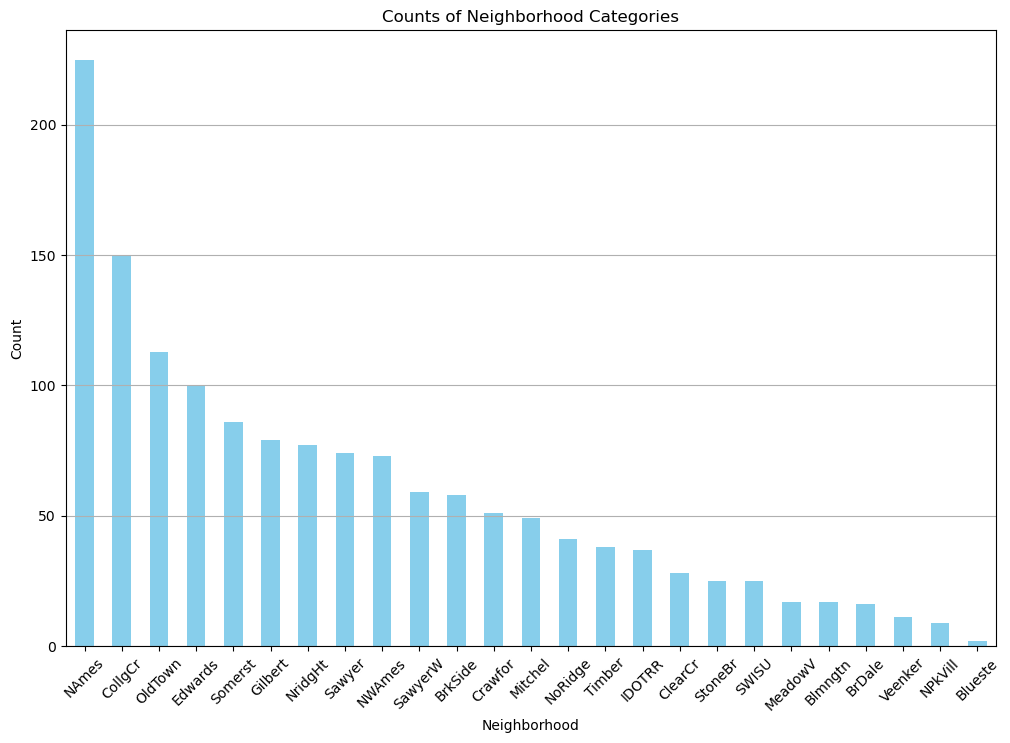

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from Excel file
house_df = pd.read_excel("C:/Users/r_mat/Classwork/Project_04/train_processed.xlsx")

# Get the counts of each Neighborhood category
neighborhood_counts = house_df['Neighborhood'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 8))
neighborhood_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Neighborhood Categories')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Show gridlines only on y-axis
plt.show()
